In [1]:
#https://github.com/hennypurwadi/Web_Scraping

import requests 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup 
import datetime
from datetime import datetime, timedelta
import time
import schedule
import csv
import h5py
import pytrends
from pytrends.request import TrendReq

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Write header in empty csv file

filedf = "dailybtcprice.csv"
with open(filedf, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Date', 'BTC'])
        print("file written")

file written


In [3]:
#Write url_options.csv

url_options = "url_options.csv"
with open(url_options, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['list_url'])
        writer.writerow(['https://www.google.com/search?&q=bitcoin price in US'])
        writer.writerow(['https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD'])
        writer.writerow(['https://coinmarketcap.com/currencies/bitcoin/'])
        writer.writerow(['https://trends.google.com/trends/explore?date=today%201-m&geo=US&q=bitcoin'])
        print("file written")

file written


In [4]:
today = datetime.now().date()
today = str(today)

Some_url = pd.read_csv('url_options.csv')
url = Some_url['list_url'].iloc[0]

req = requests.get(url)
scrap = BeautifulSoup(req.text, 'lxml')
btc_price = scrap.find("div", class_ = "BNeawe iBp4i AP7Wnd").text

filedf = "dailybtcprice.csv"

# write new data into csv
with open(filedf, 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerow([today, btc_price])
    print("file written")
    
def job(time, price):
    
    url = 'https://www.google.com/search?&q=bitcoin price in US'
    req = requests.get(url)
    scrap = BeautifulSoup(req.text, 'lxml')
    btc_price = scrap.find("div", class_ = "BNeawe iBp4i AP7Wnd").text
        
    filedf = "dailybtcprice.csv"
    
    # append new data into csv new row
    with open(filedf, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([today, btc_price])
        print("file written")        

file written


In [5]:
#read url_options.csv
Some_url = pd.read_csv('url_options.csv')
Some_url['list_url'].iloc[0]

'https://www.google.com/search?&q=bitcoin price in US'

In [6]:
btc_price

'36.707,80 Dolar Amerika Serikat'

In [7]:
%%writefile web_scrape.py

import requests 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup 
import datetime
from datetime import datetime, timedelta
import time
import schedule
import csv
import h5py
import pytrends
from pytrends.request import TrendReq
    
today = datetime.now().date()
today = str(today)

Some_url = pd.read_csv('url_options.csv')
#url = 'https://www.google.com/search?&q=bitcoin price in US'
url = Some_url['list_url'].iloc[0]

req = requests.get(url)
scrap = BeautifulSoup(req.text, 'lxml')
btc_price = scrap.find("div", class_ = "BNeawe iBp4i AP7Wnd").text
        
def job(time, price):
        
    filedf = "dailybtcprice.csv"
    
    # write new data into csv
    with open(filedf, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([today, btc_price])
        print("new row written")     
        
schedule.every().day.at("09:00").do(job)

if __name__ == "__main__":
    job(today, btc_price)

Writing web_scrape.py


In [8]:
#read dataset csv
df = pd.read_csv('dailybtcprice.csv')
df.head(3)

,Date,BTC
0,2022-02-01,"38.777,80 Dolar Amerika Serikat"
1,2022-02-02,"36.859,90 Dolar Amerika Serikat"
2,2022-02-03,"37.077,90 Dolar Amerika Serikat"


### HDF5

In [9]:
#Create empty HDF file
file = h5py.File('dailybtcprice2.h5','w')

#Create an empty dataset in HDF5 file
filefh = file.create_dataset('dailybtcprice2.h5',(29,6))
filefh

<HDF5 dataset "dailybtcprice2.h5": shape (29, 6), type "<f4">

In [10]:
#write to dataset HDF5
hf5 = df.to_hdf('dailybtcprice2.h5', 'w')
#print('hf5 file saved')

#read from dataset HDF5
file = h5py.File('dailybtcprice2.h5','r+')
list(file.keys())

['dailybtcprice2.h5', 'w']

In [11]:
#Load the datasets
hf = pd.read_hdf('dailybtcprice2.h5')
hf.head(3)

,Date,BTC
0,2022-02-01,"38.777,80 Dolar Amerika Serikat"
1,2022-02-02,"36.859,90 Dolar Amerika Serikat"
2,2022-02-03,"37.077,90 Dolar Amerika Serikat"


In [12]:
#Slice datasets HDF5
hf['BTC_Price'] = hf['BTC'].str.slice(0, 6)
hf['BTC_Currency'] = hf['BTC'].str.slice(10, 31)
hf.tail(3)

,Date,BTC,BTC_Price,BTC_Currency
21,2022-02-22,"37.669,10 Dolar Amerika Serikat",37.669,Dolar Amerika Serikat
22,2022-02-23,"37.478,10 Dolar Amerika Serikat",37.478,Dolar Amerika Serikat
23,2022-02-24,"37.627,40 Dolar Amerika Serikat",37.627,Dolar Amerika Serikat


In [13]:
#drop unused Columns in HDF5 file
hf=hf.drop(['BTC','BTC_Currency'], axis = 1)
hf.head(3)

,Date,BTC_Price
0,2022-02-01,38.777
1,2022-02-02,36.859
2,2022-02-03,37.077


In [14]:
hf["Date"].dtypes

dtype('O')

In [15]:
#Change dtypes from str become float

hf['BTC_Price'] = hf[('BTC_Price')].astype(float)
hf.dtypes

Date          object
BTC_Price    float64
dtype: object

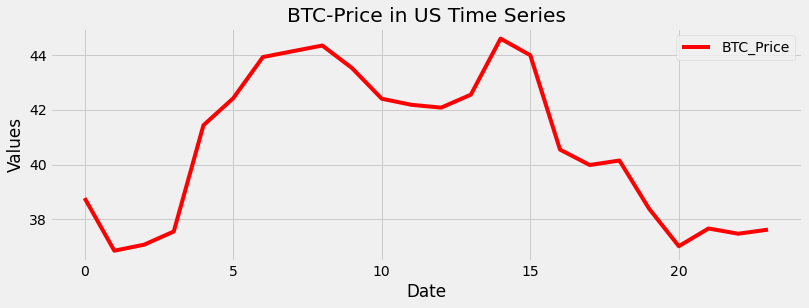

In [16]:
#Plot BTC Time Series

plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 4))

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("BTC-Price in US Time Series")
 
# plotting the columns
plt.plot(hf["BTC_Price"], label = 'BTC_Price', color = 'r')
plt.legend()
plt.savefig("BTC_US_Time Series_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### csv

In [17]:
#Slice datasets csv
df['BTC_Price'] = df['BTC'].str.slice(0, 6)
df['BTC_Currency'] = df['BTC'].str.slice(10, 31)
df.head(3)

,Date,BTC,BTC_Price,BTC_Currency
0,2022-02-01,"38.777,80 Dolar Amerika Serikat",38.777,Dolar Amerika Serikat
1,2022-02-02,"36.859,90 Dolar Amerika Serikat",36.859,Dolar Amerika Serikat
2,2022-02-03,"37.077,90 Dolar Amerika Serikat",37.077,Dolar Amerika Serikat


In [18]:
#drop unused Columns
df=df.drop(['BTC','BTC_Currency'], axis = 1)
df

,Date,BTC_Price
0,2022-02-01,38.777
1,2022-02-02,36.859
2,2022-02-03,37.077
3,2022-02-04,37.558
4,2022-02-05,41.433
5,2022-02-06,42.415
6,2022-02-07,43.919
7,2022-02-08,44.130
8,2022-02-09,44.339
9,2022-02-10,43.517


In [19]:
#Change dtypes from str become float

df['BTC_Price'] = df[('BTC_Price')].astype(float)
df.dtypes

Date          object
BTC_Price    float64
dtype: object

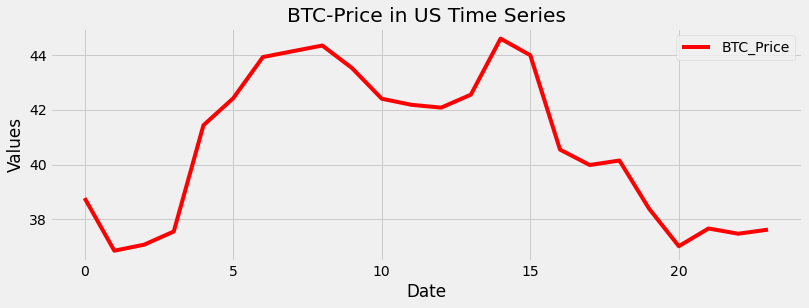

In [20]:
#Plot BTC Time Series

plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 4))

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("BTC-Price in US Time Series")
 
# plotting the columns
plt.plot(df["BTC_Price"], label = 'BTC_Price', color = 'r')
plt.legend()
plt.savefig("BTC_US_Time Series_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

## Google Trends

In [48]:
#https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

pytrend = TrendReq()
keys=['Bitcoin'] 
country=["US"]
keys_codes=[pytrend.suggestions(keyword=i)[0] for i in keys] 
df_codes= pd.DataFrame(keys_codes)

real_keys=df_codes['mid'].to_list()
specific_real_key = list(zip(*[iter(real_keys)]*1))
specific_real_key = [list(x) for x in specific_real_key]

collect = {}
i = 1
for country in country:
    for key in specific_real_key:
        pytrend.build_payload(kw_list=key, timeframe = ('2022-02-01 2022-02-21'), 
            geo = country, cat=0, gprop="") 
        collect[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(collect, axis=1)

df_trends.columns = df_trends.columns.droplevel(0) 
df_trends = df_trends.drop('isPartial', axis = 1) 
df_trends.reset_index(level=0,inplace=True) 

#change column names
df_trends.columns=['date','BTC_Trends_US']  
df_trends.head(29)

,date,BTC_Trends_US
0,2022-02-01,88
1,2022-02-02,83
2,2022-02-03,86
3,2022-02-04,91
4,2022-02-05,96
5,2022-02-06,80
6,2022-02-07,100
7,2022-02-08,94
8,2022-02-09,99
9,2022-02-10,90


In [49]:
#Save as HDF5 dataset

today = datetime.now().date()
today = str(today)
df_trends.to_csv(today + '_trends.csv','w')
print("csv file trends saved")

h5File_df_trends = (today + '_trends.h5')
df_trends.to_hdf(h5File_df_trends, 'w')
print('h5File_df_trends file saved')

csv file trends saved
h5File_df_trends file saved


In [50]:
#Load the datasets
hf_trends = pd.read_hdf(h5File_df_trends)
hf_trends.tail(3)

,date,BTC_Trends_US
18,2022-02-19,74
19,2022-02-20,87
20,2022-02-21,83


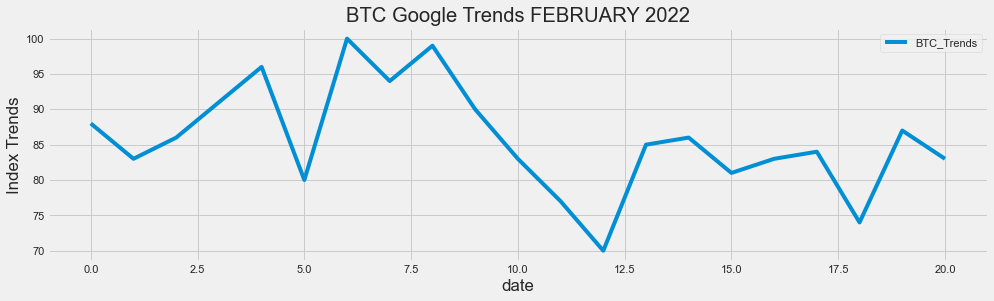

In [51]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 4))

plt.xlabel("date")
plt.ylabel("Index Trends")
plt.title("BTC Google Trends FEBRUARY 2022")
 
# plotting the columns
plt.plot(hf_trends["BTC_Trends_US"], label = 'BTC_Trends')
plt.legend()
plt.savefig("BTC_Trends_FEB2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

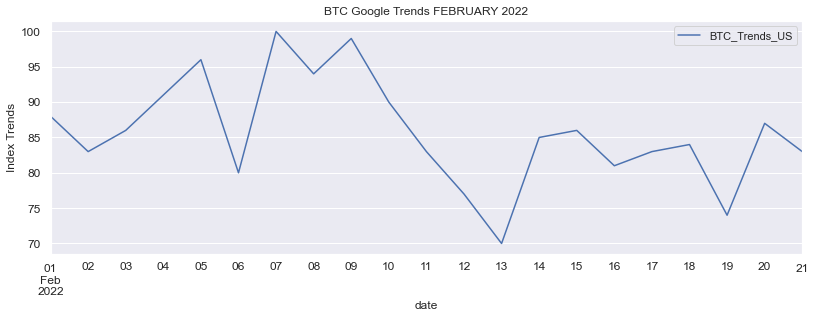

In [52]:
sns.set(color_codes=True, palette='deep')
ht = hf_trends.plot(figsize = (12,4),x="date", y=['BTC_Trends_US'], title = "BTC Google Trends FEBRUARY 2022", kind="line")
ht.set_ylabel('Index Trends')
ht.tick_params( which='both', axis='both', labelsize=12)
plt.savefig("BTC_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

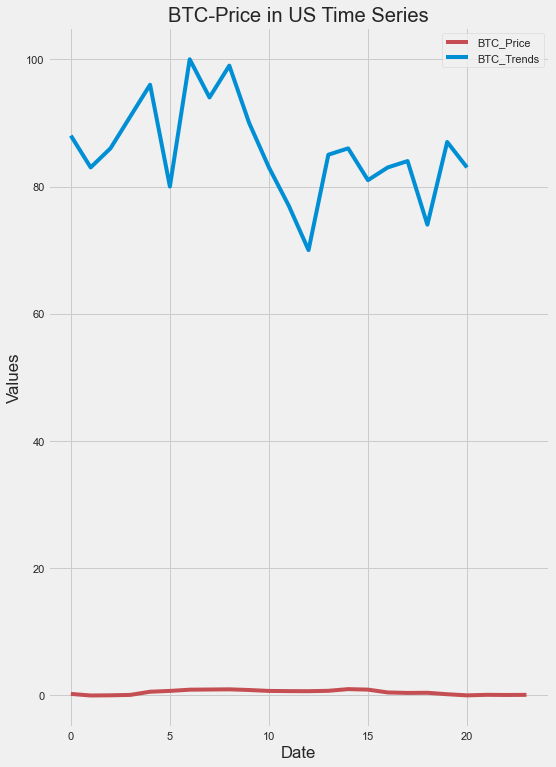

In [53]:
#Plot BTC Time Series and Google Trends before standardized

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 12))

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("BTC-Price in US Time Series")
 
# plotting the columns
plt.plot(df["BTC_Price"], label = 'BTC_Price', color = 'r')
plt.plot(hf_trends["BTC_Trends_US"], label = 'BTC_Trends')
plt.legend()
plt.savefig("BTC_vs Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

### Standarize BTC Price and BTC Trends 

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for df in [df]:
    df['BTC_Price'] = scaler.fit_transform(df['BTC_Price'].to_numpy().reshape(-1, 1))    
df.head(4)    

,Date,BTC_Price
0,2022-02-01,0.248060
1,2022-02-02,0.000000
2,2022-02-03,0.028195
3,2022-02-04,0.090404


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for hf_trends in [hf_trends]:
    hf_trends["BTC_Trends_US"] = scaler.fit_transform(hf_trends["BTC_Trends_US"].to_numpy().reshape(-1, 1))    
hf_trends.head(4)   

,date,BTC_Trends_US
0,2022-02-01,0.600000
1,2022-02-02,0.433333
2,2022-02-03,0.533333
3,2022-02-04,0.700000


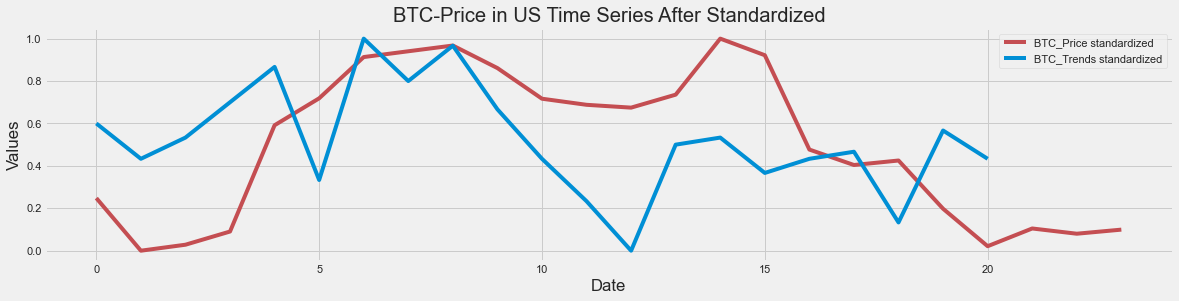

In [56]:
#Plot STANDARDIZED BTC Time Series and Google Trends

plt.style.use("fivethirtyeight")
plt.figure(figsize=(18, 4))

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("BTC-Price in US Time Series After Standardized")
 
# plotting the columns
plt.plot(df["BTC_Price"], label = 'BTC_Price standardized', color = 'r')
plt.plot(hf_trends["BTC_Trends_US"], label = 'BTC_Trends standardized')
plt.legend()
plt.savefig("BTC_vs Trends_FEBRUARY2022_Standardized.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [57]:
hf_trends["date"].dtypes

dtype('<M8[ns]')

In [58]:
#Change datatype
hf_trends["date"] = hf_trends["date"].astype(str)
hf_trends["date"].dtypes

dtype('O')

In [59]:
hf_trends["Date"] = hf_trends["date"].str.slice(0, 10)
hf_trends.head(3)

,date,BTC_Trends_US,Date
0,2022-02-01,0.600000,2022-02-01
1,2022-02-02,0.433333,2022-02-02
2,2022-02-03,0.533333,2022-02-03


In [60]:
hf_trends = hf_trends.drop(columns=['date'])
hf_trends.head(3)

,BTC_Trends_US,Date
0,0.600000,2022-02-01
1,0.433333,2022-02-02
2,0.533333,2022-02-03


In [61]:
#Combine 2 dataframes
dfhf = pd.merge(df,hf_trends, on=["Date", "Date"])
dfhf.tail(3)

,Date,BTC_Price,BTC_Trends_US
18,2022-02-19,0.425246,0.133333
19,2022-02-20,0.197879,0.566667
20,2022-02-21,0.021211,0.433333


### Correlation Heatmap

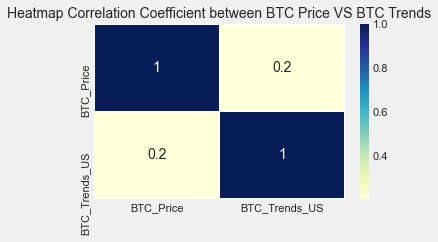

In [62]:
# generate heatmap of correlation coefficients 
plt.figure(figsize=(5, 3)) # create figure  

sns.heatmap(dfhf.corr(),linewidths = .4,  cmap="YlGnBu", annot = True)  
plt.title("Heatmap Correlation Coefficient between BTC Price VS BTC Trends", size = 14,)
plt.savefig("heatmap_BTC_Price_Trends.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show() # show figure  

In [ ]:
#There are positive weak correlation between BTC Price vs BTC Trends